# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to create a video, explaining the main part of the code, upload it to youtube or any other video sharing service and provide the link in the form given in the submission section of the course.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
1. Video for Feature 1: 15 marks
1. Feature 2: 35 marks
1. Video for Feature 2: 15 marks

In [3]:
# install dlib (will take 10 or more minutes)
!apt update
!pip install cmake
!pip install dlib
!pip install face-utils
!git clone https://github.com/nicolasmetallo/eameo-faceswap-generator
# cd into directory
%cd eameo-faceswap-generator

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,426 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,295

In [4]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load faceBlendCommon file to use common functions.

In [5]:
import faceBlendCommon as fbc

In [6]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

In [7]:
# Landmark model location
PREDICTOR_PATH =  "shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

In [8]:
from google.colab import files
jpg = files.upload()

Saving girl-no-makeup.jpg to girl-no-makeup.jpg


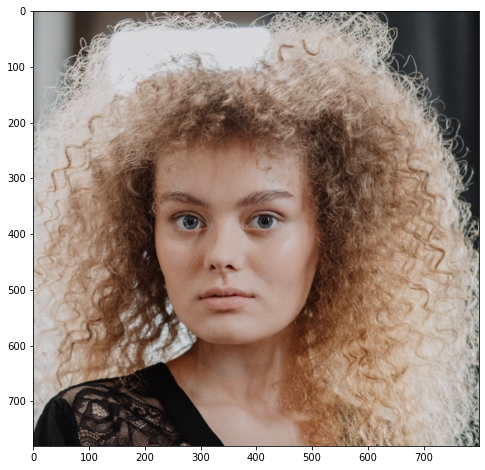

In [9]:
im = cv2.imread('girl-no-makeup.jpg')

im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)#

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [10]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
print(points)

[(216, 375), (217, 411), (224, 446), (233, 480), (242, 515), (258, 547), (283, 574), (313, 594), (350, 600), (390, 595), (430, 579), (464, 557), (488, 524), (501, 487), (508, 447), (513, 408), (514, 369), (223, 343), (241, 326), (268, 325), (293, 333), (317, 346), (362, 345), (389, 331), (418, 321), (449, 321), (474, 336), (338, 374), (337, 397), (335, 419), (333, 442), (315, 465), (326, 468), (337, 471), (351, 468), (364, 465), (252, 378), (268, 368), (289, 369), (307, 385), (287, 390), (266, 389), (382, 384), (401, 369), (423, 367), (441, 375), (426, 387), (404, 389), (293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (377, 528), (356, 535), (341, 536), (326, 535), (310, 530), (303, 516), (327, 512), (340, 512), (354, 511), (391, 513), (354, 512), (341, 513), (327, 513)]


# <font color="blue">TODO</font>
You have to implement 2 features from the above list. You can also think about a new feature and implement. 


# <font color="blue">Feature 1</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

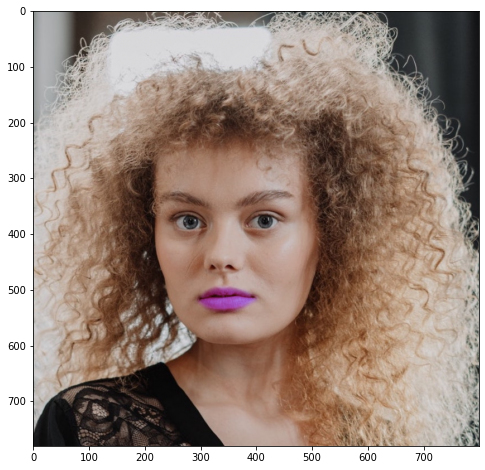

In [ ]:

def lipstick_mask(im,lipstick_r,lipstick_g,lipstick_b):

  #identify lip landmarkers
  lipsPoints = points[48:60]

  #create a lipstick mask
  mask = np.zeros((im.shape[0], im.shape[1], 3), dtype=np.float32)
  cv2.fillConvexPoly(mask, np.int32(lipsPoints), (lipstick_r,lipstick_g,lipstick_b))

  # Apply close operation to improve mask
  mask = 255*np.uint8(mask)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,40))

  # Blur the mask to obtain natural result
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, 1)
  # Calculate inverse mask
  mask = cv2.GaussianBlur(mask,(15,15),cv2.BORDER_DEFAULT)

  # Convert masks to float to perform blending
  inverseMask = cv2.bitwise_not(mask)
  mask = mask.astype(float)/255

  # Apply color mapping for the lips
  inverseMask = inverseMask.astype(float)/255

  # Convert lips and face to 0-1 range
  lips = cv2.applyColorMap(im, cv2.COLORMAP_INFERNO)
  lips = lips.astype(float)/255

  # Multiply lips and face by the masks
  ladyFace = im.astype(float)/255
  justLips = cv2.multiply(mask, lips)

  # Add face and lips
  justFace = cv2.multiply(inverseMask, ladyFace)
  result = justFace + justLips
  return result

#create lipstick color
r, g, b = (207., 40., 57.)  # lipstick color
result=lipstick_mask(im,r, g, b)
plt.imshow(result)

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

In [44]:
from scipy.interpolate import interp1d
import face_utils

face_detector = dlib.get_frontal_face_detector()
lndMrkDetector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def shape_to_np(shape, dtype="int"):
    # initialize (x, y) coordinates to zero
    coords = np.zeros((shape.num_parts, 2), dtype=dtype)

    # loop through 68 facial landmarks and convert them to a 2-tuple of (x, y)- coordinates
    for i in range(0, shape.num_parts):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    return coords

def drawEyeliner(img,color,thickness):
    #convert the image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # The 2nd argument means that we upscale the image by 'x' number of times to detect more faces.
    bounding_boxes = face_detector(gray, 0)
    #if a face is detected then 
    if bounding_boxes:    
        for i, bb in enumerate(bounding_boxes):
            #identify facial landmarks
            face_landmark_points = lndMrkDetector(gray, bb)
            #convert the landmarks to 2-tuple of x,y coordinates
            face_landmark_points = shape_to_np(face_landmark_points)
            #identify the left and right eye landmarks
            eye_landmark_points = getEyeLandmarkPoints(face_landmark_points)
            #get the eyeline landmarks
            eyeliner_points = getEyelinerPoints(eye_landmark_points)
            #draw the eyeliner
            result = addEyeliner(img, color,thickness,eyeliner_points) 
            
    return result

def interpolateCoordinates(xy_coords, x_intrp):
    # we only know the points of the top, bottom and side of eye coordinates
    # We’ll interpolate the points in between each of the given points
    x = xy_coords[:, 0]
    y = xy_coords[:, 1]
    intrp = interp1d(x, y, kind='quadratic')
    y_intrp = intrp(x_intrp)
    y_intrp = np.floor(y_intrp).astype(int)
    return y_intrp

def getEyeLandmarkPoints(face_landmark_points):
    #first we get all of the facial landmark features
    #then we will only select the eye landmarks
    face_landmark_points[36][0]-=5
    face_landmark_points[39][0]+=5
    face_landmark_points[42][0]-=5
    face_landmark_points[45][0]+=5
    
    L_eye_top = face_landmark_points[36: 40]
    L_eye_bottom = np.append(face_landmark_points[39: 42], face_landmark_points[36]).reshape(4,2)

    R_eye_top = face_landmark_points[42:  46]
    R_eye_bottom = np.append(face_landmark_points[45:48], face_landmark_points[42]).reshape(4,2)
       
    return [L_eye_top, L_eye_bottom, R_eye_top, R_eye_bottom]

def getEyelinerPoints(eye_landmark_points):
    #After identifying the eye landmarks, we will extrapolate the coordinates between the landmarks
    #This will be used to identify the eyeliner points
    L_eye_top, L_eye_bottom, R_eye_top, R_eye_bottom = eye_landmark_points

    L_interp_x = np.arange(L_eye_top[0][0], L_eye_top[-1][0], 1)
    R_interp_x = np.arange(R_eye_top[0][0], R_eye_top[-1][0], 1)

    L_interp_top_y = interpolateCoordinates(L_eye_top, L_interp_x)
    L_interp_bottom_y = interpolateCoordinates(L_eye_bottom, L_interp_x)

    R_interp_top_y = interpolateCoordinates(R_eye_top, R_interp_x)
    R_interp_bottom_y = interpolateCoordinates(R_eye_bottom, R_interp_x)

    return [(L_interp_x, L_interp_top_y, L_interp_bottom_y), (R_interp_x, R_interp_top_y, R_interp_bottom_y)]

def addEyeliner(img, color,thickness,interp_pts):
    #Here we choose the color and thickness of the eyeliner.
    L_eye_interp, R_eye_interp = interp_pts
    L_interp_x, L_interp_top_y, L_interp_bottom_y = L_eye_interp
    R_interp_x, R_interp_top_y, R_interp_bottom_y = R_eye_interp


    for i in range(len(L_interp_x)-2):
        x1 = L_interp_x[i]
        y1_top = L_interp_top_y[i]
        x2 = L_interp_x[i+1]
        y2_top = L_interp_top_y[i+1]
        cv2.line(img, (x1, y1_top), (x2, y2_top), color, thickness)

        y1_bottom = L_interp_bottom_y[i]
        y2_bottom = L_interp_bottom_y[i+1]
        cv2.line(img, (x1, y1_bottom), (x1, y2_bottom), color, thickness)

    
    for i in range(len(R_interp_x)-2):
        x1 = R_interp_x[i]
        y1_top = R_interp_top_y[i]
        x2 = R_interp_x[i+1]
        y2_top = R_interp_top_y[i+1]
        cv2.line(img, (x1, y1_top), (x2, y2_top), color, thickness)

        y1_bottom = R_interp_bottom_y[i]
        y2_bottom = R_interp_bottom_y[i+1]
        cv2.line(img, (x1, y1_bottom), (x1, y2_bottom), color, thickness)

    return img



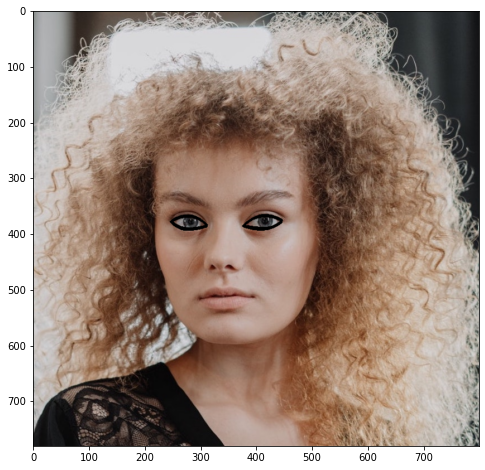

In [45]:
color= (0., 0., 0.)
thickness=3
result=drawEyeliner(im,color,thickness)
plt.imshow(result)